**********************************************************
# Upper Limit on WIMP Cross Section
***********************************************************

In this notebook we calculate an upper limit on the WIMP cross section with the Yellin maximum gap method. Our implementation is fast and good to get a first impression of the physics output of sime measurement. However, for publications it is recommended to use a more advances method, as e.g. a likelihood fit or the Yellin maximum interval method. Both are implemented in the Julia-based program "Romeo" of Daniel Schmiedmayer (daniel.schmiedmayer(at)oeaw.ac.at).

In [1]:
import cait as ai
import numpy as np
%config InlineBackend.figure_formats = ['svg']  # we need this for a suitable resolution of the plots

We first create an instance of the limit calculation class. We hand the masses of the atoms in the detector material compound and their atomic numbers, as well as the confidence level of the upper limit.

In [2]:
limit = ai.limit.Limit(exposure=52.15,
                       component_mass=np.array([112.411, 183.84, 4 * 15.999]),
                       component_nucleons=np.array([112, 184, 16]),
                       confidence=0.9,
                       )

In [140]:
limit_a = ai.limit.Limit(exposure=1,
                       component_mass=np.array([2 * 26.981, 3 * 15.999]), # Al2 O3
                       component_nucleons=np.array([26, 16]),
                       confidence=0.9,
                       )

limit_b = ai.limit.Limit(exposure=1,
                       component_mass=np.array([28.084]), # Al2 O3
                       component_nucleons=np.array([28]),
                       confidence=0.9,
                       )

This tutorial works with data from the CRESST-II experiment, publicly available at https://arxiv.org/abs/1701.08157.

We include the cut efficiencies of the seperate nuclei and the recoil spectrum. Adapt the paths according to your local data directory.

In [3]:
limit.import_efficiencies(paths=['test_data/anc/Lise_eff_eRecoils_Ca.dat',
                                 'test_data/anc/Lise_eff_eRecoils_W.dat',
                                 'test_data/anc/Lise_eff_eRecoils_O.dat',
                                 ])

limit.import_observations('test_data/anc/Lise_eRecoils.dat')

Efficiencies from 3 files imported.
Observed Recoils imported.


Let's have a look at the observed event spectrum, the expected wimp distribution and recoil distribution for three exemplars wimp masses.

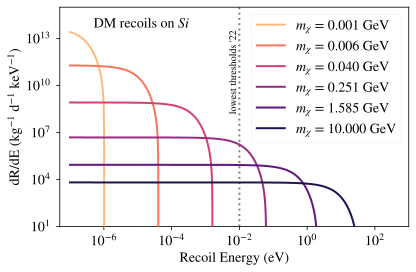

In [143]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import seaborn as sns

clwhl = list(sns.color_palette("magma_r"))

fontsize = 14
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['axes.titlesize'] = fontsize
mpl.rcParams['axes.labelsize'] = fontsize
mpl.rcParams['legend.fontsize'] = fontsize
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

plt.figure(figsize=(6,4), dpi=300)

x = np.logspace(-7, 2, 10000)
wimp_masses = np.logspace(-3, 1, 6)  # [.01, .1, 1, 10]
for i, m in enumerate(wimp_masses):
    # y = [ai.limit.expected_interaction_rate(e, m, 16)*3 + ai.limit.expected_interaction_rate(e, m, 26)*2 for e in x]
    y = [ai.limit.expected_interaction_rate(e, m, 14) for e in x]
    plt.plot(x, y, label="$m_\chi$ = {:.3f} GeV".format(m), zorder=10 + 2*i, c=clwhl[i])
plt.xlabel("Recoil Energy (eV)")
plt.ylabel("dR/dE (kg$^{-1}$ d$^{-1}$ keV$^{-1}$)")
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e-8, 1e3)
plt.ylim(1e1, 1e15)
plt.axvline(.01, color='grey', linestyle='dotted')
plt.text(.005, 2e8, "lowest thresholds '22", rotation=90, fontsize=10)
plt.text(5e-7,5e13, "DM recoils on $Si$")
plt.legend()
plt.savefig('test_data/recoil_spectra.pdf')
plt.show()

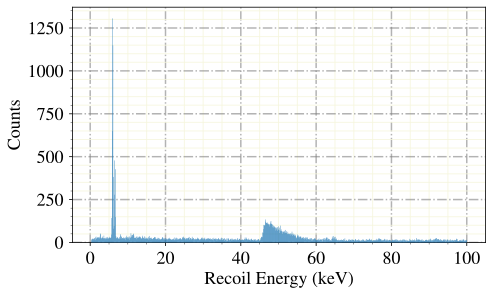

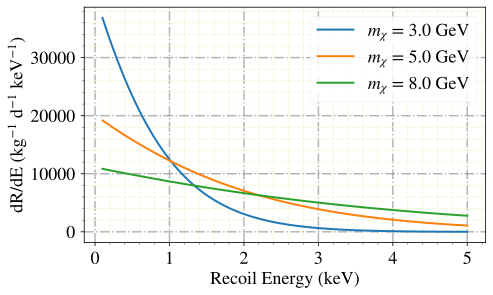

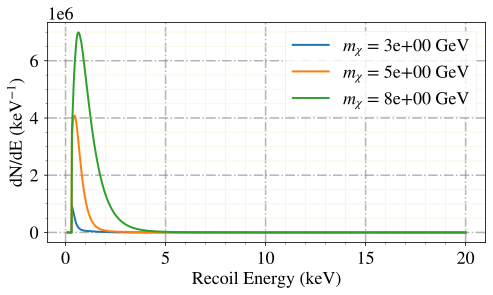

In [4]:
limit.plot_observations()
limit.plot_wimp_distribution()
limit.plot_recoil_distribution()

Finally, we calculate and plot the limit.

Start calculation.


  0%|          | 0/50 [00:00<?, ?it/s]

Plot the limit.


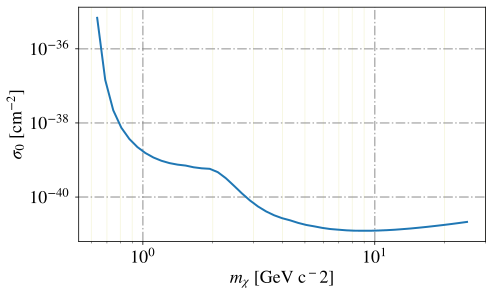

In [5]:
x, y = limit.calc_upper_limit(ll=0.5, ul=25., steps=50, plot=True)

Questions and feedback about this notebook, please forward to jens.burhart(at)oeaw.ac.at and felix.wagner(at)oeaw.ac.at.